In [1]:
# Librerías principales de PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Torchvision para modelos pre-entrenados y transformaciones de imágenes
import torchvision
import torchvision.transforms as transforms
from torchvision import models

# Librerías auxiliares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import random
import os

# Fijar semillas para reproducibilidad
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [1]:
# Clonar el repositorio en Colab
!git clone https://github.com/Fablop84/deep_learning.git

# Cambiar al directorio del repo
%cd deep_learning

Cloning into 'deep_learning'...
remote: Enumerating objects: 3005, done.
remote: Counting objects: 100% (3005/3005), done.
remote: Compressing objects: 100% (1485/1485), done.
remote: Total 3005 (delta 28), reused 3000 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (3005/3005), 5.72 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/deep_learning


In [2]:
# Si estás en Colab, primero conecta a tu entorno y ejecuta esto:
!git clone https://github.com/Fablop84/deep_learning.git
%cd deep_learning

Cloning into 'deep_learning'...
remote: Enumerating objects: 3005, done.
remote: Counting objects: 100% (3005/3005), done.
remote: Compressing objects: 100% (1485/1485), done.
remote: Total 3005 (delta 28), reused 3000 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (3005/3005), 5.72 MiB | 11.23 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/deep_learning/deep_learning


In [3]:
# Se visualiza los archivos en el repositorio
!ls

data  Practica_Deep_Learning_Fabian_Lopez.ipynb  requirements.txt  scripts


In [4]:
import pandas as pd
import os

# Ruta al archivo CSV
csv_path = os.path.join("data", "poi_dataset.csv")

# Cargar el dataset
try:
    df_poi = pd.read_csv(csv_path)
    print(f"CSV cargado correctamente. Número de filas: {len(df_poi)}")
    print("Columnas disponibles:", df_poi.columns.tolist())
except FileNotFoundError:
    print(f" No se encontró el archivo en: {csv_path}")
except Exception as e:
    print(f"Error al cargar el CSV: {e}")

CSV cargado correctamente. Número de filas: 1569
Columnas disponibles: ['id', 'name', 'shortDescription', 'categories', 'tier', 'locationLon', 'locationLat', 'tags', 'xps', 'Visits', 'Likes', 'Dislikes', 'Bookmarks', 'main_image_path']


In [5]:
# Realizo una exploración general del dataset

# Primeras filas
df_poi.head()


,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"['Escultura', 'Pintura']",1,2.642262,39.572694,[],500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","['Patrimonio', 'Historia']",1,-3.704467,40.423037,[],500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","['Ciencia', 'Patrimonio']",2,-3.699694,40.442045,[],250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",['Cultura'],1,-3.691228,40.427256,[],500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","['Patrimonio', 'Cultura']",1,-3.727822,40.439665,[],500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...


In [6]:
# Información general del dataset
df_poi.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


In [7]:
# Estadísticas descriptivas de las columnas numéricas
df_poi.describe()

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1.541109,-1.132337,39.900141,750.382409,10011.943276,3623.908222,2526.305927,973.261950
std,0.637677,22.733401,9.662134,228.319854,5.456808,4817.879374,2225.543360,1453.333948
min,1.000000,-121.951049,-62.940930,0.000000,10001.000000,100.000000,52.000000,50.000000
25%,1.000000,-3.725292,40.411754,600.000000,10008.000000,464.000000,937.000000,116.000000
50%,1.000000,-3.699140,40.421738,700.000000,10011.000000,1434.000000,2718.000000,306.000000
75%,2.000000,-3.673348,40.472458,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000
max,4.000000,158.333118,65.706572,1000.000000,10038.000000,26425.000000,10999.000000,8157.000000


In [8]:
# Conteo de valores nulos por columna
df_poi.isnull().sum()

# Verificar duplicados
duplicados = df_poi.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

Filas duplicadas: 0


In [9]:
# Conteo de categorías
df_poi['categories'].value_counts().head(10)


,count
categories,
"['Patrimonio', 'Historia', 'Arquitectura']",100
"['Patrimonio', 'Arquitectura', 'Historia']",84
"['Historia', 'Cultura', 'Escultura']",76
"['Cultura', 'Patrimonio', 'Historia', 'Misterio']",69
"['Cultura', 'Escultura', 'Historia']",66
"['Cultura', 'Arquitectura', 'Historia']",64
"['Cultura', 'Historia', 'Escultura']",51
"['Cultura', 'Historia', 'Arquitectura']",47
"['Cultura', 'Historia', 'Misterio']",44


In [10]:
# Conteo de tags (si están separados por comas) para entender de manera general cuales son las palabras más utilizadas
df_poi['tags'].str.split(',').explode().value_counts().head(10)

,count
tags,
'Historia',710
'Cultura',504
'Madrid',425
'Escultura',326
'Arquitectura',307
'Arte',294
['Madrid',269
'Estatua',265
'Patrimonio',197


In [11]:
# Estadísticas de engagement
df_poi[['Visits','Likes','Dislikes','Bookmarks','xps']].describe()


,Visits,Likes,Dislikes,Bookmarks,xps
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,10011.943276,3623.908222,2526.305927,973.261950,750.382409
std,5.456808,4817.879374,2225.543360,1453.333948,228.319854
min,10001.000000,100.000000,52.000000,50.000000,0.000000
25%,10008.000000,464.000000,937.000000,116.000000,600.000000
50%,10011.000000,1434.000000,2718.000000,306.000000,700.000000
75%,10015.000000,6840.000000,3399.000000,1309.000000,1000.000000
max,10038.000000,26425.000000,10999.000000,8157.000000,1000.000000


In [12]:
# Verifico que las imagenes cargadas en el repo de GitHub efectivamente no existen. Esto porque tuve unos inconvenientes con subir las imagenes a GitHub

import os

# Verificar si las rutas de imágenes existen
missing_images = df_poi[~df_poi['main_image_path'].apply(lambda x: os.path.exists(os.path.join("data", "data_main", x)))]
print(f"Imágenes faltantes: {len(missing_images)}")

Imágenes faltantes: 1569


In [13]:
# Como tuve problemas con el manejo de las imagenes, decidí subirlas a mi Google Drive
# y desde allí gestionar los permisos de descargas de las imagenes, es decir, que los usuarios
# autorizados pueden acceder a las imagenes para descargarlas desde un .zip
# para acceder a las imagenes voy a utilizar la función gdown

!pip install gdown

# Descargar el ZIP desde Drive
!gdown --id 1Zccp97gB8WZE15Uo5cbekvB8cv66z8sX -O data/data_main.zip

# Descomprimir en la carpeta correcta
!unzip -o data/data_main.zip -d data/

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Zccp97gB8WZE15Uo5cbekvB8cv66z8sX
To: /content/deep_learning/deep_learning/data/data_main.zip
100% 6.36M/6.36M [00:00<00:00, 31.1MB/s]
Archive:  data/data_main.zip
   creating: data/data_main/
   creating: data/data_main/002b3c1f-37f0-4d36-84d4-2d7132f83fe7/
  inflating: data/data_main/002b3c1f-37f0-4d36-84d4-2d7132f83fe7/main.jpg  
   creating: data/data_main/005fe23a-7f9e-4a57-a24a-1e9a6f1c1702/
  inflating: data/data_main/005fe23a-7f9e-4a57-a24a-1e9a6f1c1702/main.jpg  
   creating: data/data_main/00761a42-1b02-42f3-b2b2-211ffd985118/
  inflating: data/data_main/00761a42-1b02-42f3-b2b2-211ffd985118/main.jpg  
   creating: data/data_main/0089bb20-c132-496c-b215-1986fcfa9d4b/
  inflating: data/data_main/0089bb20-c132-

In [14]:
# Verificar que las imagenes existen y están disponibles
import os

# Crear columna con ruta completa correcta
df_poi['image_full_path'] = df_poi['main_image_path'].apply(
    lambda p: os.path.join("data", os.path.normpath(p))
)

# Verificar existencia
df_poi['image_exists'] = df_poi['image_full_path'].apply(os.path.exists)

# Contar disponibles y faltantes
available = df_poi['image_exists'].sum()
missing = (~df_poi['image_exists']).sum()

print("Imágenes disponibles:", available)
print("Imágenes faltantes:", missing)

if missing == 0:
    print("Todas las imágenes se cargaron y están correctamente listas.")
else:
    print("Algunas imágenes faltan, revisa los ejemplos:")
    print(df_poi.loc[~df_poi['image_exists'], ['id','main_image_path','image_full_path']].head())

Imágenes disponibles: 1569
Imágenes faltantes: 0
Todas las imágenes se cargaron y están correctamente listas.


In [15]:
# Preprocesar y limpiar texto: Se eliminan tildes, guiones y otros caracteres para procesar mejor la información si es necesario.

import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-záéíóúñ\s]", "", text)  # quitar símbolos
    return text.strip()

df_poi["text_clean"] = df_poi["name"].astype(str) + " " + df_poi["shortDescription"].astype(str)
df_poi["text_clean"] = df_poi["text_clean"].apply(clean_text)

df_poi[["name","shortDescription","text_clean"]].head()

,name,shortDescription,text_clean
0,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,galería fran reus la galería fran reus es un e...
1,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...",convento de san plácido el convento de san plá...
2,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...",instituto geológico y minero de españa el inst...
3,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",margarita gil rosset margarita gil rosset escu...
4,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...",museo del traje centro de investigación del pa...


In [16]:
# Categorización por ubicación: Me parece relevante utilizar la información de latitud y longitud, sin embargo, procesar los 1.569 registros es muy complejo.
# Intenté hacer una geocodificación inversa, es decir, convertir las coordenada latitud y longitud a ciudad y país, pero el procesamiento
# era muy pesado y demorado, igual no había certeza de sí el resultado iba a ser satisfactorio con nombres de ciudades y países plenamente indentificados.
# De todas formas, considero importante categorizar los puntos de interés por regiones o zonas geográficas, voy a utilizar KMeans para agrupar los POIs
# por áreas cercanas, cada cluster de estos representa una zona geográfica. Y con la media de la latitud y longitud el centroide del cluster, de igual manera
# cuento la cantidad de registros por cluster.

from sklearn.cluster import KMeans
import pandas as pd

# Seleccionamos coordenadas
coords = df_poi[["locationLat", "locationLon"]]

# Definir número de clusters: Si bien se definieron 10 clusters, al final es la cantidad que dejó finalmente, más adelante presento un análisis para determinar
# la cantidad "óptima" de clusters a definir.
kmeans = KMeans(n_clusters=10, random_state=42)
df_poi["geo_cluster"] = kmeans.fit_predict(coords)

# Calcular centroides y cantidad de registros por cluster
cluster_summary = df_poi.groupby("geo_cluster").agg(
    centroid_lat=("locationLat", "mean"),
    centroid_lon=("locationLon", "mean"),
    count=("geo_cluster", "size")
).reset_index()

print("Clusters asignados y resumen generado")
cluster_summary

Clusters asignados y resumen generado


,geo_cluster,centroid_lat,centroid_lon,count
0,0,40.576933,-4.091977,1311
1,1,-1.056122,114.955292,6
2,2,-5.058546,-74.593220,6
3,3,30.135810,-95.413456,18
4,4,45.827717,16.919333,96
5,5,32.708072,129.896294,18
6,6,43.174609,69.188995,11
7,7,53.003829,-1.965348,51
8,8,36.384936,38.476638,36
9,9,-35.935882,-59.073723,16


In [17]:
# En este punto con la media del cluster, el centroide determino la ciudad y el país donde se encuentran los registros, cuento la cantidad de registros por cluster.
import os
import pandas as pd
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

# Ruta donde guardaremos/cargaremos los resultados
CLUSTERS_FILE = "data/cluster_centroids.csv"

# Crear carpeta data si no existe
os.makedirs("data", exist_ok=True)

# --- Si el archivo ya existe, lo cargamos directamente ---
if os.path.exists(CLUSTERS_FILE):
    cluster_centroids = pd.read_csv(CLUSTERS_FILE)
    print("Centroides cargados desde archivo:", CLUSTERS_FILE)

else:
    print("Calculando clusters y geocodificación...")

    # Paso 1: Clustering (ejemplo con 10 clusters)
    coords = df_poi[["locationLat","locationLon"]]
    kmeans = KMeans(n_clusters=10, random_state=42)
    df_poi["geo_cluster"] = kmeans.fit_predict(coords)

    # Paso 2: Calcular centroides y cantidad de registros
    cluster_centroids = df_poi.groupby("geo_cluster").agg(
        centroid_lat=("locationLat", "mean"),
        centroid_lon=("locationLon", "mean"),
        count=("geo_cluster", "size")
    ).reset_index()

    # Paso 3: Geocodificación de centroides
    geolocator = Nominatim(user_agent="poi_geocoder")

    def get_city_country(lat, lon):
        location = geolocator.reverse((lat, lon), language="en")
        if location and "address" in location.raw:
            address = location.raw["address"]
            city = address.get("city", address.get("town", address.get("village", "")))
            country = address.get("country", "")
            return city, country
        return None, None

    cluster_centroids["city"], cluster_centroids["country"] = zip(*cluster_centroids.apply(
        lambda row: get_city_country(row["centroid_lat"], row["centroid_lon"]), axis=1
    ))

    # Guardar resultados para reutilizar en reinicios
    cluster_centroids.to_csv(CLUSTERS_FILE, index=False)
    print("Clusters asignados, centroides calculados y ciudades/países añadidos")
    print("Resultados guardados en:", CLUSTERS_FILE)

# --- Verificación rápida ---
print(cluster_centroids.head())

Calculando clusters y geocodificación...


Clusters asignados, centroides calculados y ciudades/países añadidos
Resultados guardados en: data/cluster_centroids.csv
   geo_cluster  centroid_lat  centroid_lon  count              city  \
0            0     40.576933     -4.091977   1311       El Escorial   
1            1     -1.056122    114.955292      6          Trinsing   
2            2     -5.058546    -74.593220      6          Parinari   
3            3     30.135810    -95.413456     18                     
4            4     45.827717     16.919333     96  Općina Nova Rača   

         country  
0          Spain  
1      Indonesia  
2           Peru  
3  United States  
4        Croatia  


In [18]:
#Verifico la cantidad de clusters
import pandas as pd
cluster_centroids = pd.read_csv("data/cluster_centroids.csv")
print("Número de clusters:", cluster_centroids['geo_cluster'].nunique())
print(cluster_centroids[['geo_cluster','city','country','count']])

Número de clusters: 10
   geo_cluster                     city         country  count
0            0              El Escorial           Spain   1311
1            1                 Trinsing       Indonesia      6
2            2                 Parinari            Peru      6
3            3                      NaN   United States     18
4            4         Općina Nova Rača         Croatia     96
5            5                 Nagasaki           Japan     18
6            6                      NaN      Kazakhstan     11
7            7  Staffordshire Moorlands  United Kingdom     51
8            8         All Hajj Ibrahim           Syria     36
9            9                      NaN       Argentina     16


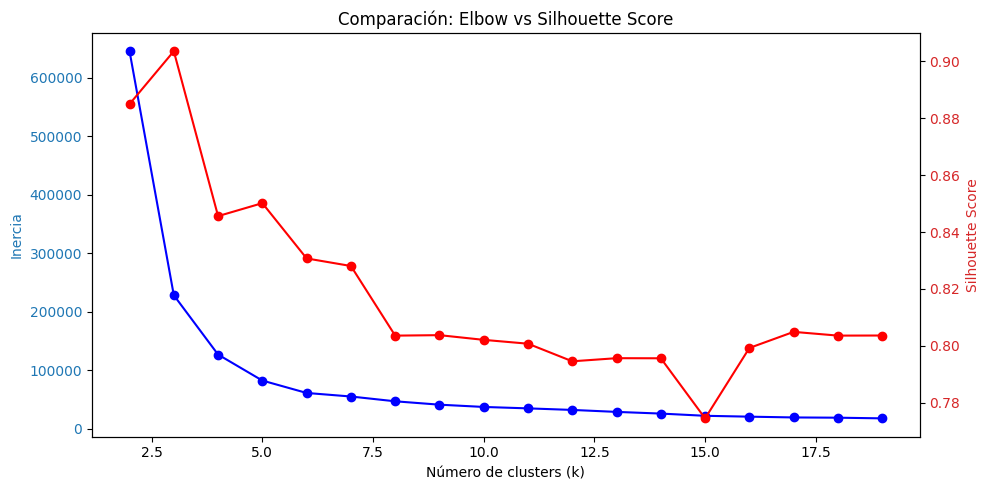

In [19]:
# Los métodos presentados a continuación determinan de manera estadística y visual la cantidad de clusters que mejor representan el dataset, con las gráficas
# y los investigado la mejor opción era escoger entre 3 y 5 clusters, sin embargo, al ver 3 y 5 clusters agrupaba demasiado las ubicaciones, lo hice también
# con 15 clusters y la divide demasiado quedando muchos 'Nones o NA', por lo tanto decidí como lo mencione anteriormente dejar 10 clusers.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

coords = df_poi[["locationLat", "locationLon"]]
K = range(2, 20)

inertias = []
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(coords)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(coords, kmeans.labels_))

# Gráfica combinada
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel("Número de clusters (k)")
ax1.set_ylabel("Inercia", color=color)
ax1.plot(K, inertias, "bo-", label="Inercia")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Silhouette Score", color=color)
ax2.plot(K, sil_scores, "ro-", label="Silhouette")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparación: Elbow vs Silhouette Score")
fig.tight_layout()
plt.show()

In [20]:
# Agrego los campos city y country al dataset principal
import pandas as pd

# --- Cargar centroides con city y country ---
cluster_centroids = pd.read_csv("data/cluster_centroids.csv")

# Verificar estructura
print("Cluster centroids:")
print(cluster_centroids.head())

# --- Unir al df_poi ---
# df_poi ya debe tener la columna 'geo_cluster' asignada en el paso de KMeans
df_poi = df_poi.merge(
    cluster_centroids[["geo_cluster", "city", "country"]],
    on="geo_cluster",
    how="left"
)

# --- Validar resultado ---
print("df_poi con city y country añadidos:")
print(df_poi[["id","geo_cluster","city","country"]].head())

Cluster centroids:
   geo_cluster  centroid_lat  centroid_lon  count              city  \
0            0     40.576933     -4.091977   1311       El Escorial   
1            1     -1.056122    114.955292      6          Trinsing   
2            2     -5.058546    -74.593220      6          Parinari   
3            3     30.135810    -95.413456     18               NaN   
4            4     45.827717     16.919333     96  Općina Nova Rača   

         country  
0          Spain  
1      Indonesia  
2           Peru  
3  United States  
4        Croatia  
df_poi con city y country añadidos:
                                     id  geo_cluster         city country
0  4b36a3ed-3b28-4bc7-b975-1d48b586db03            0  El Escorial   Spain
1  e32b3603-a94f-49df-8b31-92445a86377c            0  El Escorial   Spain
2  0123a69b-13ac-4b65-a5d5-71a95560cff5            0  El Escorial   Spain
3  390d7d9e-e972-451c-b5e4-f494af15e788            0  El Escorial   Spain
4  023fc1bf-a1cd-4b9f-af78-48792ab

In [21]:
# Verifico los campos del dataset recurrentemente para garantizar que los pasos que hago se reflejen correctamente
df_poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
 14  image_full_path   1569 non-null   object 
 15  image_exists      1569 non-null   bool   
 16  text_clean        1569 non-null   object 


In [22]:
# Normalizar variables numéricas

# Revisando el dataset las variables numéricas con las que se van a hacer los indicadores de engagement tienen diferentes escalas, revisando los métodos de
# normalización el que me parece más adecuado es el Min-Max Scaling pues mantiene proporciones y todo en un rango fijo, lo cual hace más fácil de interpretar
# las diferentes variables siempre en un rango [0,1]. En este caso se desea tener todas las caracteristicas en un mismo rango comparable y no realizar
# comparaciones de desviaciones frente a la media o análisis de ese estilo, por lo tanto, escojo el método de Min-Max Scaling.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_poi[["Visits_norm","Likes_norm","Dislikes_norm","Bookmarks_norm","xps_norm"]] = scaler.fit_transform(
    df_poi[["Visits","Likes","Dislikes","Bookmarks","xps"]]
)

df_poi[["Visits","Visits_norm","Likes","Likes_norm"]].head()

,Visits,Visits_norm,Likes,Likes_norm
0,10009,0.216216,422,0.012232
1,10010,0.243243,7743,0.290332
2,10015,0.378378,3154,0.116011
3,10011,0.270270,8559,0.321330
4,10020,0.513514,915,0.030959


In [23]:
# Medidas o ratios de engagement: Con estas medidas pienso medir el nivel de engagement o en este caso interacciones o "conexiones" sobre los diferentes sitios
# o puntos de interés

import numpy as np

# --- Crear ratios de engagement ---
df_poi["like_ratio"] = df_poi["Likes"] / (df_poi["Likes"] + df_poi["Dislikes"] + 1e-5)  # proporción de interacciones positivas
df_poi["bookmark_rate"] = df_poi["Bookmarks"] / (df_poi["Visits"] + 1e-5)              # porcentaje de visitantes que guardan el POI
df_poi["xp_per_visit"] = df_poi["xps"] / (df_poi["Visits"] + 1e-5)                     # experiencia acumulada por visita

# --- Crear ratios de dislikes ---
df_poi["dislike_ratio"] = df_poi["Dislikes"] / (df_poi["Likes"] + df_poi["Dislikes"] + 1e-5)  # proporción de interacciones negativas
df_poi["dislikes_per_visit"] = df_poi["Dislikes"] / (df_poi["Visits"] + 1e-5)                 # tasa de rechazo relativa al tráfico

# --- Ver primeras filas para validar ---
df_poi[[
    "Likes", "Dislikes", "Visits",
    "like_ratio", "dislike_ratio",
    "Bookmarks", "bookmark_rate",
    "xps", "xp_per_visit",
    "dislikes_per_visit"
]].head()


,Likes,Dislikes,Visits,like_ratio,dislike_ratio,Bookmarks,bookmark_rate,xps,xp_per_visit,dislikes_per_visit
0,422,3582,10009,0.105395,0.894605,78,0.007793,500,0.049955,0.357878
1,7743,96,10010,0.987754,0.012246,2786,0.278322,500,0.049950,0.009590
2,3154,874,10015,0.783019,0.216981,595,0.059411,250,0.024963,0.087269
3,8559,79,10011,0.990854,0.009146,2358,0.235541,500,0.049945,0.007891
4,915,2896,10020,0.240094,0.759906,143,0.014271,500,0.049900,0.289022


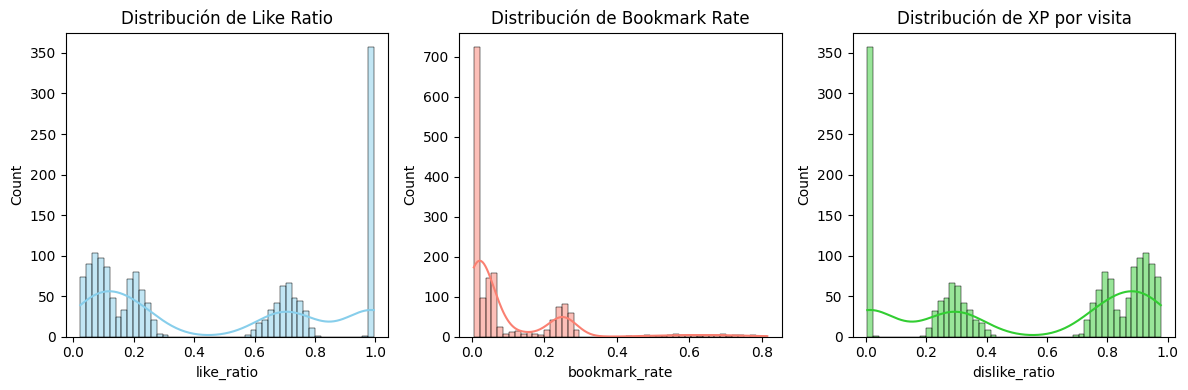

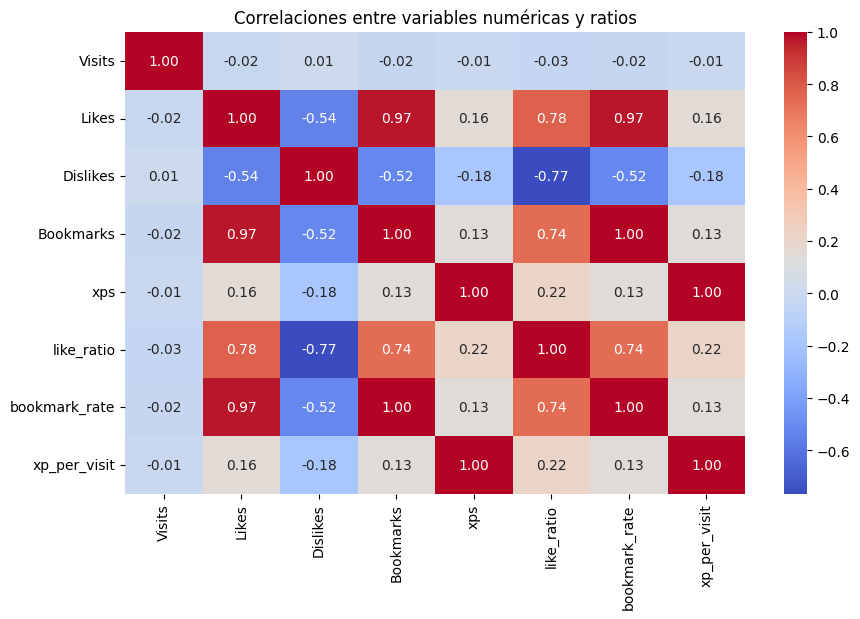

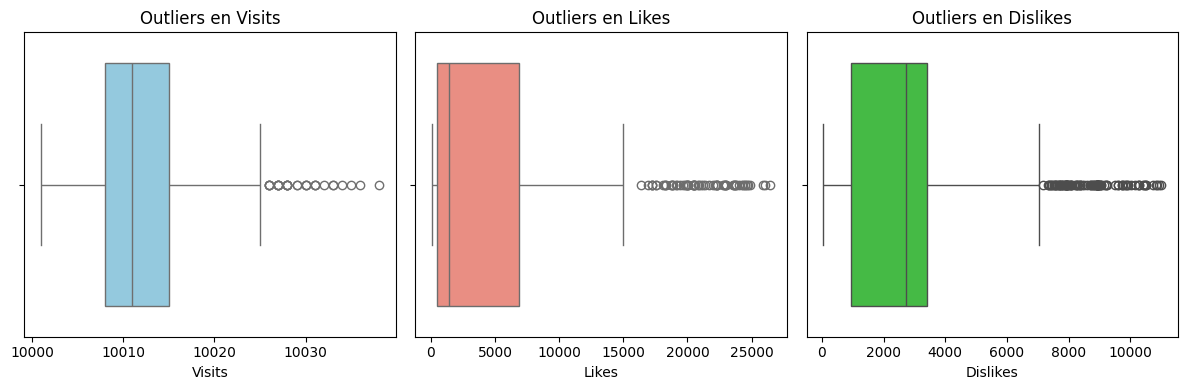

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Distribuciones ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df_poi["like_ratio"], bins=50, kde=True, color="skyblue")
plt.title("Distribución de Like Ratio")

plt.subplot(1,3,2)
sns.histplot(df_poi["bookmark_rate"], bins=50, kde=True, color="salmon")
plt.title("Distribución de Bookmark Rate")

plt.subplot(1,3,3)
sns.histplot(df_poi["dislike_ratio"], bins=50, kde=True, color="limegreen")
plt.title("Distribución de XP por visita")

plt.tight_layout()
plt.show()

# --- Correlaciones ---
plt.figure(figsize=(10,6))
corr_matrix = df_poi[["Visits","Likes","Dislikes","Bookmarks","xps",
                      "like_ratio","bookmark_rate","xp_per_visit"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas y ratios")
plt.show()

# --- Outliers ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_poi["Visits"], color="skyblue")
plt.title("Outliers en Visits")

plt.subplot(1,3,2)
sns.boxplot(x=df_poi["Likes"], color="salmon")
plt.title("Outliers en Likes")

plt.subplot(1,3,3)
sns.boxplot(x=df_poi["Dislikes"], color="limegreen")
plt.title("Outliers en Dislikes")

plt.tight_layout()
plt.show()

In [25]:
# --- Función para detectar outliers usando IQR ---
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR
    return df[(df[columna] > limite_superior) | (df[columna] < limite_inferior)]

# Detectar outliers y forzar copia
out_visits = detectar_outliers(df_poi, "Visits").copy()
out_likes = detectar_outliers(df_poi, "Likes").copy()
out_dislikes = detectar_outliers(df_poi, "Dislikes").copy()

# Etiquetar con .loc
out_visits.loc[:, "outlier_tipo"] = "Visits"
out_likes.loc[:, "outlier_tipo"] = "Likes"
out_dislikes.loc[:, "outlier_tipo"] = "Dislikes"

# Unir resultados
outliers_total = pd.concat([out_visits, out_likes, out_dislikes], ignore_index=True)

# Seleccionar columnas relevantes
cols = ["name", "Visits", "Likes", "Dislikes", "outlier_tipo"]
outliers_total[cols].sort_values("outlier_tipo")

,name,Visits,Likes,Dislikes,outlier_tipo
98,Casa de Cisneros,10008,1971,7758,Dislikes
125,Estatua de Carlos V de España y I de Alemania,10008,509,7819,Dislikes
126,Estatua de Carlos II,10012,721,9738,Dislikes
127,Monumento a Federico Chueca y Robles,10006,1034,8053,Dislikes
128,Monumentos en Honor a Diego de Silva Velázquez,10008,621,8273,Dislikes
...,...,...,...,...,...
26,La tumba de Psusennes I,10033,2281,6592,Visits
27,Londinum Mithraeum,10027,858,2882,Visits
28,La última morada de Don Rodrigo,10033,3112,1037,Visits
14,Galería de las Grutas del Jardín de Felipe II,10028,712,2718,Visits


   geo_cluster                     city         country   mean_likes  \
0            0              El Escorial           Spain  3446.865751   
1            1                 Trinsing       Indonesia  3639.000000   
2            2                 Parinari            Peru  4720.666667   
3            4         Općina Nova Rača         Croatia  5456.666667   
4            5                 Nagasaki           Japan  3559.277778   
5            7  Staffordshire Moorlands  United Kingdom  3123.470588   
6            8         All Hajj Ibrahim           Syria  4776.611111   

   sum_likes  mean_dislikes  sum_dislikes  mean_bookmarks  sum_bookmarks  \
0    4518841    2618.957285       3433453      927.448513        1215885   
1      21834    2843.666667         17062      926.333333           5558   
2      28324    1427.333333          8564      868.166667           5209   
3     523840    1833.656250        176031     1535.000000         147360   
4      64067    2203.388889         39661  

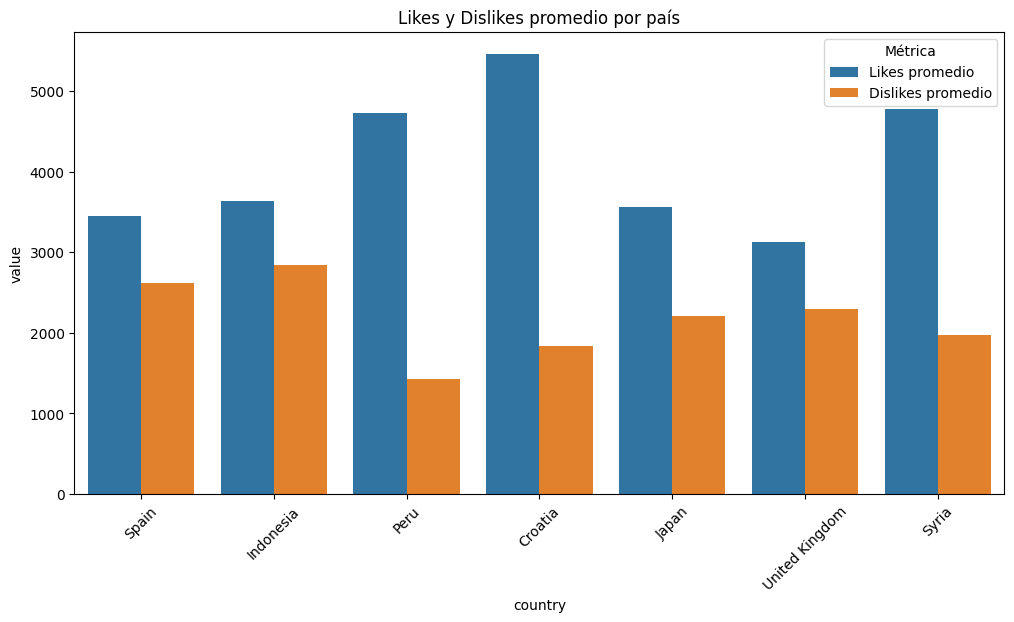

In [70]:
# Agrupar por cluster, city y country
engagement_summary = df_poi.groupby(["geo_cluster","city","country"]).agg(
    mean_likes=("Likes","mean"),
    sum_likes=("Likes","sum"),
    mean_dislikes=("Dislikes","mean"),
    sum_dislikes=("Dislikes","sum"),
    mean_bookmarks=("Bookmarks","mean"),
    sum_bookmarks=("Bookmarks","sum"),
    count=("geo_cluster","size")
).reset_index()

# Mostrar tabla resumen
print(engagement_summary.head(10))


# Pasar a formato largo
plot_data = engagement_summary.melt(
    id_vars=["country"],
    value_vars=["mean_likes","mean_dislikes"],
    var_name="metric",
    value_name="value"
)

# Renombrar métricas para la leyenda
plot_data["metric"] = plot_data["metric"].map({
    "mean_likes": "Likes promedio",
    "mean_dislikes": "Dislikes promedio"
})

plt.figure(figsize=(12,6))
sns.barplot(data=plot_data, x="country", y="value", hue="metric")
plt.title("Likes y Dislikes promedio por país")
plt.xticks(rotation=45)
plt.legend(title="Métrica")
plt.show()


In [71]:
#######------------------
#Hasta este punto he realizado el análisis del dataste de metadatos y la creación de métricas de engagement. En los siguientes pasos realizaré el preprocesamiento de las imagenes
#para luego integrarlas con los metadatos




In [26]:
# En este paso extraigo y analizo las imagenes cargadas iniciales, reviso dimensiones, tipo de formato, imagenes coruptas o ilegibles, etc.

from PIL import Image
from tqdm import tqdm
import os
import pandas as pd

# --- Paso 1: Análisis de imágenes ---
image_stats = []

for idx, row in tqdm(df_poi.iterrows(), total=len(df_poi)):
    # Construir ruta correcta
    image_path = os.path.join("data", os.path.normpath(row["main_image_path"]))
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            image_stats.append({
                "id": row["id"],
                "path": row["main_image_path"],
                "width": width,
                "height": height,
                "format": img.format,
                "error": None
            })
    except Exception as e:
        image_stats.append({
            "id": row["id"],
            "path": row["main_image_path"],
            "width": None,
            "height": None,
            "format": None,
            "error": str(e)
        })

# Convertir a DataFrame
image_df = pd.DataFrame(image_stats)

# Estadísticas generales
print("Formatos más comunes:")
print(image_df["format"].value_counts())

print("\nDimensiones promedio:")
print(image_df[["width","height"]].describe())

print("\nImágenes corruptas o no legibles:")
corrupt_images = image_df[image_df["error"].notnull()]
print(corrupt_images[["id","path","error"]].head())

100%|██████████| 1569/1569 [00:00<00:00, 6376.24it/s]

Formatos más comunes:
format
JPEG    1569
Name: count, dtype: int64

Dimensiones promedio:
        width  height
count  1569.0  1569.0
mean    128.0   128.0
std       0.0     0.0
min     128.0   128.0
25%     128.0   128.0
50%     128.0   128.0
75%     128.0   128.0
max     128.0   128.0

Imágenes corruptas o no legibles:
Empty DataFrame
Columns: [id, path, error]
Index: []


In [27]:
# --- No se encontraron imagenes corruptas o ilegibles, todas tienen el mismo formato JPEG y tienen las mismas dimensiones 128x128 pixeles

In [28]:
# Embedding o representación en vectores de las imagenes, la salida es un vector de 512 dimensiones
import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from torchvision.models import ResNet18_Weights
from PIL import Image

# --- Transformaciones de entrada ---
weights = ResNet18_Weights.DEFAULT
transform = weights.transforms()  # usa directamente las transformaciones recomendadas por los pesos

# --- Modelo preentrenado ResNet18 ---
base_model = models.resnet18(weights=weights)
embedding_model = nn.Sequential(*list(base_model.children())[:-1])  # quitamos la capa final
embedding_model.eval()

# --- Función para obtener embeddings ---
def get_embedding(image_path):
    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0)
    with torch.no_grad():
        embedding = embedding_model(img_t).squeeze().numpy()
    return embedding

# --- Ejemplo: obtener embedding de la primera imagen ---
sample_path = os.path.join("data", os.path.normpath(df_poi.iloc[0]["main_image_path"]))
embedding = get_embedding(sample_path)
print("Embedding shape:", embedding.shape)  # (512,)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 190MB/s]


Embedding shape: (512,)


In [29]:
# Transformación y Normalización con ResNet18
# Extracción y almacenamiento de los embeddings o vectores de las imagenes

import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import models
from torchvision.models import ResNet18_Weights
from PIL import Image
from tqdm import tqdm

# --- Configuración de pesos y transformaciones ---
weights = ResNet18_Weights.DEFAULT
transform = weights.transforms()  # resize + normalización estándar de ImageNet

# --- Modelo preentrenado ResNet18 ---
base_model = models.resnet18(weights=weights)
embedding_model = nn.Sequential(*list(base_model.children())[:-1])  # quitamos la capa final
embedding_model.eval()

# --- Función para obtener embeddings ---
def get_embedding(image_path):
    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0)  # añadir batch dimension
    with torch.no_grad():
        embedding = embedding_model(img_t).squeeze().numpy()
    return embedding

# --- Extraer embeddings de todas las imágenes ---
embeddings = []
ids = []

for idx, row in tqdm(df_poi.iterrows(), total=len(df_poi)):
    # Ajuste de ruta: solo anteponer "data/"
    image_path = os.path.join("data", os.path.normpath(row["main_image_path"]))
    try:
        emb = get_embedding(image_path)
        embeddings.append(emb)
        ids.append(row["id"])
    except Exception as e:
        print(f"Error con {row['id']} en {image_path}: {e}")
        # Para mantener la forma, añadimos un vector nulo si falla
        embeddings.append(np.zeros(512))
        ids.append(row["id"])

embeddings = np.array(embeddings)  # shape: (N, 512)

print("Shape final de embeddings:", embeddings.shape)

# --- Guardar embeddings en disco ---
np.save("data/image_embeddings.npy", embeddings)
np.save("data/image_ids.npy", np.array(ids))

100%|██████████| 1569/1569 [01:37<00:00, 16.16it/s]

Shape final de embeddings: (1569, 512)


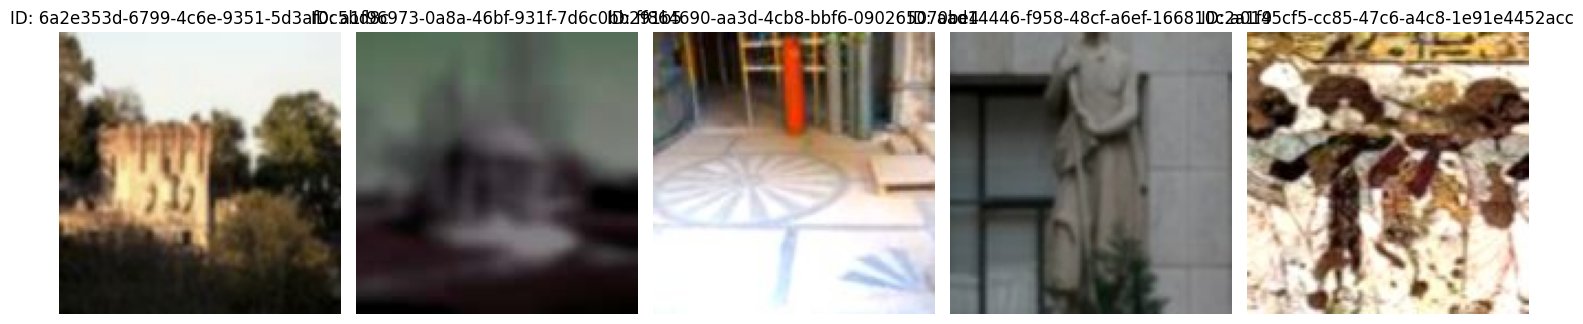

In [30]:
# Seleccionamos algunas filas de ejemplo para demostrar que están cargadas correctamente con su Id correspondiente
import matplotlib.pyplot as plt
from PIL import Image
import os

# Seleccionamos algunas filas de ejemplo para demostrar que están cargadas correctamente con su Id correspondiente
sample_rows = df_poi.sample(5, random_state=42)  # 5 imágenes aleatorias

plt.figure(figsize=(15,5))

for i, (_, row) in enumerate(sample_rows.iterrows()):
    # Ajuste de ruta: solo anteponer "data/"
    image_path = os.path.join("data", os.path.normpath(row["main_image_path"]))
    img = Image.open(image_path).convert("RGB")

    # Mostrar imagen
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"ID: {row['id']}")

plt.tight_layout()
plt.show()

In [31]:
# Convertir todas las columnas de df_poi a minúsculas (lo debí haber hecho antes)
df_poi.columns = df_poi.columns.str.lower()

# Verificación
print("Columnas normalizadas:")
print(df_poi.columns.tolist())

Columnas normalizadas:
['id', 'name', 'shortdescription', 'categories', 'tier', 'locationlon', 'locationlat', 'tags', 'xps', 'visits', 'likes', 'dislikes', 'bookmarks', 'main_image_path', 'image_full_path', 'image_exists', 'text_clean', 'geo_cluster', 'city', 'country', 'visits_norm', 'likes_norm', 'dislikes_norm', 'bookmarks_norm', 'xps_norm', 'like_ratio', 'bookmark_rate', 'xp_per_visit', 'dislike_ratio', 'dislikes_per_visit']


In [32]:
# Confirmación valores campo tier
print(df_poi["tier"].unique())
print(df_poi["tier"].describe())

[1 2 3 4]
count    1569.000000
mean        1.541109
std         0.637677
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: tier, dtype: float64


In [33]:
#--- 4. Procesamiento tabular ---
# De acuerdo con los pasos establecidos en el pipeline (Ver documento: Memoria_Técnica_Detallada_Práctica_Fabian_López.pdf / Pipeline) ahora vamos en el paso 4 procesamiento tabular
# para seleccionar los features relevantes que van a integrarse con las imagenes (integración multimodal) y posteriormente serán modelados, entrenados, validados y testeados.


import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Selección de columnas relevantes
engagement_cols = [
    "likes", "dislikes", "bookmarks",
    "likes_norm", "dislikes_norm", "bookmarks_norm",
    "like_ratio", "bookmark_rate", "xp_per_visit",
    "dislike_ratio", "dislikes_per_visit"
]

context_cols = ["city", "country", "geo_cluster"]
metadata_cols = ["tier", "categories", "visits", "xps"]

selected_cols = ["id"] + engagement_cols + context_cols + metadata_cols

# Crear dataframe tabular
tabular_df = df_poi[selected_cols].copy()

# --- Normalización adicional ---
scaler = MinMaxScaler()
tabular_df[["visits_norm", "xps_norm"]] = scaler.fit_transform(tabular_df[["visits", "xps"]])


# --- Codificación de variables categóricas ---
# Primero city y country
tabular_df = pd.get_dummies(tabular_df, columns=["city", "country"], drop_first=True)

# Ahora categories: convertir listas en string y luego expandir
df_poi["categories_str"] = df_poi["categories"].apply(lambda x: ",".join(x) if isinstance(x, list) else str(x))
categories_dummies = df_poi["categories_str"].str.get_dummies(sep=",")
tabular_df = pd.concat([tabular_df.drop(columns=["categories"]), categories_dummies], axis=1)

# --- Verificación ---
print("Shape final del dataframe tabular:", tabular_df.shape)
print("Columnas incluidas (primeras 20):", tabular_df.columns.tolist()[:20])


Shape final del dataframe tabular: (1569, 75)
Columnas incluidas (primeras 20): ['id', 'likes', 'dislikes', 'bookmarks', 'likes_norm', 'dislikes_norm', 'bookmarks_norm', 'like_ratio', 'bookmark_rate', 'xp_per_visit', 'dislike_ratio', 'dislikes_per_visit', 'geo_cluster', 'tier', 'visits', 'xps', 'visits_norm', 'xps_norm', 'city_El Escorial', 'city_Nagasaki']


In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Selección de columnas relevantes ---
engagement_cols = [
    "likes", "dislikes", "bookmarks",
    "likes_norm", "dislikes_norm", "bookmarks_norm",
    "like_ratio", "bookmark_rate", "xp_per_visit",
    "dislike_ratio", "dislikes_per_visit"
]
context_cols = ["city", "country", "geo_cluster"]
metadata_cols = ["tier", "categories", "tags", "visits", "xps"]

selected_cols = ["id"] + engagement_cols + context_cols + metadata_cols

# --- Crear dataframe base con listas intactas ---
tabular_df_clean = df_poi[selected_cols].copy()

# --- Normalización adicional ---
scaler = MinMaxScaler()
tabular_df_clean[["visits_norm", "xps_norm"]] = scaler.fit_transform(
    tabular_df_clean[["visits", "xps"]]
)

# --- Codificación de city y country ---
tabular_df_clean = pd.get_dummies(tabular_df_clean, columns=["city", "country"], drop_first=True)

# --- Importante: NO expandir categories aquí ---
# Dejamos 'categories' y 'tags' como listas para embeddings
# Los embeddings visuales se unirán después con merge

In [40]:
# Embedding de las columnas categorias y tags, las cuales al tener tantos valores generaban que un mismo id se pudiera repetir varias veces (ver pasos anteriores), por lo tanto,
# la decisión es que las columnas y tags estén representados como listas de valores únicos.
import ast
import torch
import torch.nn as nn

# --- Paso 0: asegurar que categories y tags sean listas ---
tabular_df_clean["categories"] = tabular_df_clean["categories"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
tabular_df_clean["tags"] = tabular_df_clean["tags"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# --- Paso 1: construir vocabularios ---
all_categories = set([c for cats in tabular_df_clean["categories"] for c in cats])
all_tags = set([t for tags in tabular_df_clean["tags"] for t in tags])

cat2idx = {cat: idx for idx, cat in enumerate(sorted(all_categories))}
tag2idx = {tag: idx for idx, tag in enumerate(sorted(all_tags))}

print("Tamaño vocabulario categories:", len(cat2idx))
print("Tamaño vocabulario tags:", len(tag2idx))

# --- Paso 2: definir capas de embeddings ---
embedding_dim = 32  # tamaño del vector para cada categoría/tag
category_embedding = nn.Embedding(num_embeddings=len(cat2idx), embedding_dim=embedding_dim)
tag_embedding = nn.Embedding(num_embeddings=len(tag2idx), embedding_dim=embedding_dim)

# --- Paso 3: función para obtener embeddings de un POI ---
def get_poi_embeddings(categories, tags):
    cat_indices = torch.tensor([cat2idx[c] for c in categories if c in cat2idx], dtype=torch.long)
    tag_indices = torch.tensor([tag2idx[t] for t in tags if t in tag2idx], dtype=torch.long)

    if len(cat_indices) > 0:
        cat_emb = category_embedding(cat_indices).mean(dim=0)
    else:
        cat_emb = torch.zeros(embedding_dim)

    if len(tag_indices) > 0:
        tag_emb = tag_embedding(tag_indices).mean(dim=0)
    else:
        tag_emb = torch.zeros(embedding_dim)

    return torch.cat([cat_emb, tag_emb])  # tamaño (64,)

# --- Paso 4: generar embeddings para todo el DataFrame ---
tabular_df_clean["cat_tag_emb"] = tabular_df_clean.apply(
    lambda row: get_poi_embeddings(row["categories"], row["tags"]).detach().numpy(),
    axis=1
)

print("Shape columna cat_tag_emb:", tabular_df_clean["cat_tag_emb"].iloc[0].shape)

Tamaño vocabulario categories: 12
Tamaño vocabulario tags: 2935
Shape columna cat_tag_emb: (64,)


In [41]:
#--- 5. Diseño del modelo: ---
# De acuerdo con los pasos establecidos en el pipeline (Ver documento: Memoria_Técnica_Detallada_Práctica_Fabian_López.pdf / Pipeline) ahora vamos a realizar la integración
# multimodal con el dataframe del paso anterior (tabular_df) el cual contiene un embedding de categorias y tags, este se unirá con el embeding de las imagenes.
# De todas formas voy a hacer otro dataframe más compacto utilizando embeddings categóricos para caegories y tags.

import torch
import torch.nn as nn
import torch.nn.functional as F

class MultimodalModel(nn.Module):
    def __init__(self, tabular_dim, visual_dim=512, cat_tag_dim=64, hidden_dim=256, output_dim=1, dropout=0.3):
        super(MultimodalModel, self).__init__()

        # --- Bloques de entrada ---
        self.tabular_fc = nn.Sequential(
            nn.Linear(tabular_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.visual_fc = nn.Sequential(
            nn.Linear(visual_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.cat_tag_fc = nn.Sequential(
            nn.Linear(cat_tag_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # --- Bloque de fusión multimodal ---
        fusion_dim = hidden_dim * 3
        self.fusion_fc1 = nn.Linear(fusion_dim, hidden_dim)
        self.fusion_fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, tabular_x, visual_x, cat_tag_x):
        # Procesar cada modalidad
        tab_out = self.tabular_fc(tabular_x)
        vis_out = self.visual_fc(visual_x)
        cat_tag_out = self.cat_tag_fc(cat_tag_x)

        # Concatenar
        fusion = torch.cat([tab_out, vis_out, cat_tag_out], dim=1)

        # Pasar por capas de fusión
        fusion = F.relu(self.fusion_fc1(fusion))
        output = self.fusion_fc2(fusion)

        return output

In [46]:
# He tenido problemas en unir el dataset con el embedding de las imagenes, voy a hacer paso a paso esa unión. Verifico que los embeddings estén cargados y unidos al Dataframe
image_embeddings = np.load("data/image_embeddings.npy")   # (1569, 512)
image_ids = np.load("data/image_ids.npy")                 # (1569,)

img_emb_df = pd.DataFrame(
    image_embeddings,
    columns=[f"img_emb_{i}" for i in range(image_embeddings.shape[1])]
)
img_emb_df["id"] = image_ids

print("Shape img_emb_df:", img_emb_df.shape)  # debería ser (1569, 513)

Shape img_emb_df: (1569, 513)


In [47]:
# Hago el merge con tabular_df_clean
tabular_df_clean = tabular_df_clean.merge(img_emb_df, on="id", how="left")
print("Shape final tabular_df_clean:", tabular_df_clean.shape)
print("Ejemplo columnas visuales:", [c for c in tabular_df_clean.columns if c.startswith("img_emb_")][:10])

Shape final tabular_df_clean: (1943, 548)
Ejemplo columnas visuales: ['img_emb_0', 'img_emb_1', 'img_emb_2', 'img_emb_3', 'img_emb_4', 'img_emb_5', 'img_emb_6', 'img_emb_7', 'img_emb_8', 'img_emb_9']


In [48]:
# Reviso que las columnas estén presentes
visual_cols = [c for c in tabular_df_clean.columns if c.startswith("img_emb_")]
print("Número de columnas visuales:", len(visual_cols))  # debería ser 512

Número de columnas visuales: 512


In [49]:
# Creo el dataset y Dataloader
dataset = POIDataset(df=tabular_df_clean, target_cols=["like_ratio"])
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

batch = next(iter(dataloader))
tab_x, vis_x, cat_tag_x, y = batch
print("Batch tabular:", tab_x.shape)
print("Batch visual:", vis_x.shape)      # ahora debería ser (32, 512)
print("Batch cat_tag:", cat_tag_x.shape)
print("Batch targets:", y.shape)

Batch tabular: torch.Size([32, 25])
Batch visual: torch.Size([32, 512])
Batch cat_tag: torch.Size([32, 64])
Batch targets: torch.Size([32, 1])


In [50]:
# Dataset multimodal para PyTorch
import numpy as np
import torch
from torch.utils.data import Dataset

class POIDataset(Dataset):
    def __init__(self, df, target_cols):
        self.df = df
        self.target_cols = target_cols

        # --- Tabular features (string relevantes + numéricas) ---
        tabular_cols = [
            c for c in self.df.columns
            if isinstance(c, str) and (
                c.startswith("city_") or
                c.startswith("country_") or
                c.startswith("categories_") or  # categorías ya limpias con get_dummies
                c in [
                    "likes_norm","dislikes_norm","bookmarks_norm",
                    "visits_norm","xps_norm",
                    "like_ratio","bookmark_rate","xp_per_visit","dislikes_per_visit",
                    "tier","tier_norm"
                ]
            )
        ]
        self.tabular = self.df[tabular_cols].values.astype(np.float32)

        # --- Visual embeddings (columnas con prefijo img_emb_) ---
        visual_cols = [c for c in self.df.columns if isinstance(c, str) and c.startswith("img_emb_")]
        self.visual = self.df[visual_cols].values.astype(np.float32)

        # --- Categorías/tags embeddings ---
        if "cat_tag_emb" in self.df.columns:
            self.cat_tag = np.stack(self.df["cat_tag_emb"].values).astype(np.float32)
        else:
            self.cat_tag = np.zeros((len(self.df), 64), dtype=np.float32)  # placeholder

        # --- Target ---
        self.targets = self.df[target_cols].values.astype(np.float32)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        tab_x = torch.tensor(self.tabular[idx], dtype=torch.float32)
        vis_x = torch.tensor(self.visual[idx], dtype=torch.float32)
        cat_tag_x = torch.tensor(self.cat_tag[idx], dtype=torch.float32)
        y = torch.tensor(self.targets[idx], dtype=torch.float32)
        return tab_x, vis_x, cat_tag_x, y

In [51]:
# Después de construir el dataset
from torch.utils.data import DataLoader

# Crear dataset
dataset = POIDataset(df=tabular_df_clean, target_cols=["like_ratio"])

# Crear dataloader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Obtener un batch de prueba
batch = next(iter(dataloader))
tab_x, vis_x, cat_tag_x, y = batch

print("Batch tabular:", tab_x.shape)     # (32, tabular_dim)
print("Batch visual:", vis_x.shape)      # (32, 512)
print("Batch cat_tag:", cat_tag_x.shape) # (32, 64)
print("Batch targets:", y.shape)         # (32, 1)

Batch tabular: torch.Size([32, 25])
Batch visual: torch.Size([32, 512])
Batch cat_tag: torch.Size([32, 64])
Batch targets: torch.Size([32, 1])


In [52]:
# Dividir el dataset en train, validation y test

import torch
from torch.utils.data import DataLoader, random_split

# --- Paso 1: Definir columnas objetivo ---
# Puedes usar una sola métrica (ej. like_ratio) o multitarea
target_cols = ["like_ratio"]
# Ejemplo multitarea:
# target_cols = ["like_ratio","bookmark_rate","xp_per_visit"]

# --- Paso 2: Crear dataset completo ---
dataset = POIDataset(tabular_df_clean, target_cols)

# --- Paso 3: División en train/val/test ---
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# --- Paso 4: DataLoaders ---
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Train size:", len(train_dataset))
print("Validation size:", len(val_dataset))
print("Test size:", len(test_dataset))

# --- Paso 5: Verificación de shapes ---
tab_x, vis_x, cat_tag_x, y = next(iter(train_loader))
print("Shapes ejemplo batch:")
print("Tabular:", tab_x.shape)
print("Visual:", vis_x.shape)
print("Cat/Tag:", cat_tag_x.shape)
print("Target:", y.shape)

Train size: 1360
Validation size: 194
Test size: 389
Shapes ejemplo batch:
Tabular: torch.Size([32, 25])
Visual: torch.Size([32, 512])
Cat/Tag: torch.Size([32, 64])
Target: torch.Size([32, 1])


In [ ]:
# --- Notas y explicaciones del modelo ---
# Decidí dividir los datos así 70% en train, 10% en validation y 20% en test, para este primer ejercicio deje una sola salida que es like_ratio {like_ratio}={Likes}/}{{Likes}+{Dislikes}}
# por eso la salida es una sola y el modelo va a calcular que tanto precide con relación a esa variable

In [53]:
# Entrenamiento y validación

import torch
import torch.nn as nn
import torch.optim as optim

# --- Inicializar modelo ---
tabular_dim = dataset.tabular.shape[1]  # dinámico
visual_dim = 512
cat_tag_dim = 64
hidden_dim = 256
output_dim = 1  # multitarea: >1

model = MultimodalModel(tabular_dim, visual_dim, cat_tag_dim, hidden_dim, output_dim)

# --- Loss y optimizer ---
criterion = nn.MSELoss()   # regresión
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- Configuración ---
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- Loop de entrenamiento ---
for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    train_loss = 0.0
    for tab_x, vis_x, cat_tag_x, y in train_loader:
        tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(tab_x, vis_x, cat_tag_x)
        loss = criterion(outputs.squeeze(), y.squeeze())
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * tab_x.size(0)

    train_loss /= len(train_loader.dataset)

    # Validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for tab_x, vis_x, cat_tag_x, y in val_loader:
            tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)
            outputs = model(tab_x, vis_x, cat_tag_x)
            loss = criterion(outputs.squeeze(), y.squeeze())
            val_loss += loss.item() * tab_x.size(0)

    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

# --- Evaluación final en test ---
model.eval()
test_loss = 0.0
with torch.no_grad():
    for tab_x, vis_x, cat_tag_x, y in test_loader:
        tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)
        outputs = model(tab_x, vis_x, cat_tag_x)
        loss = criterion(outputs.squeeze(), y.squeeze())
        test_loss += loss.item() * tab_x.size(0)

test_loss /= len(test_loader.dataset)
print(f"Final Test Loss: {test_loss:.4f}")

Epoch 1/20 - Train Loss: 0.0461 - Val Loss: 0.0065
Epoch 2/20 - Train Loss: 0.0079 - Val Loss: 0.0028
Epoch 3/20 - Train Loss: 0.0047 - Val Loss: 0.0023
Epoch 4/20 - Train Loss: 0.0049 - Val Loss: 0.0020
Epoch 5/20 - Train Loss: 0.0041 - Val Loss: 0.0012
Epoch 6/20 - Train Loss: 0.0035 - Val Loss: 0.0015
Epoch 7/20 - Train Loss: 0.0030 - Val Loss: 0.0008
Epoch 8/20 - Train Loss: 0.0028 - Val Loss: 0.0009
Epoch 9/20 - Train Loss: 0.0026 - Val Loss: 0.0009
Epoch 10/20 - Train Loss: 0.0028 - Val Loss: 0.0009
Epoch 11/20 - Train Loss: 0.0026 - Val Loss: 0.0007
Epoch 12/20 - Train Loss: 0.0026 - Val Loss: 0.0009
Epoch 13/20 - Train Loss: 0.0028 - Val Loss: 0.0007
Epoch 14/20 - Train Loss: 0.0023 - Val Loss: 0.0008
Epoch 15/20 - Train Loss: 0.0018 - Val Loss: 0.0013
Epoch 16/20 - Train Loss: 0.0019 - Val Loss: 0.0005
Epoch 17/20 - Train Loss: 0.0018 - Val Loss: 0.0006
Epoch 18/20 - Train Loss: 0.0018 - Val Loss: 0.0005
Epoch 19/20 - Train Loss: 0.0019 - Val Loss: 0.0010
Epoch 20/20 - Train L

In [54]:
# Agrego métricas de errores las cuales complementan los resultados y son más interpretables.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for tab_x, vis_x, cat_tag_x, y in test_loader:
        tab_x, vis_x, cat_tag_x = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device)
        outputs = model(tab_x, vis_x, cat_tag_x)
        y_true.extend(y.numpy().flatten())
        y_pred.extend(outputs.cpu().numpy().flatten())

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 0.0373
Test MAE: 0.0307
Test R²: 0.9895


Epoch 1/20 - Train Loss: 0.0022 - Val Loss: 0.0008
Epoch 2/20 - Train Loss: 0.0017 - Val Loss: 0.0005
Epoch 3/20 - Train Loss: 0.0018 - Val Loss: 0.0009
Epoch 4/20 - Train Loss: 0.0016 - Val Loss: 0.0023
Epoch 5/20 - Train Loss: 0.0018 - Val Loss: 0.0005
Epoch 6/20 - Train Loss: 0.0017 - Val Loss: 0.0005
Epoch 7/20 - Train Loss: 0.0016 - Val Loss: 0.0007
Epoch 8/20 - Train Loss: 0.0016 - Val Loss: 0.0005
Epoch 9/20 - Train Loss: 0.0015 - Val Loss: 0.0005
Epoch 10/20 - Train Loss: 0.0016 - Val Loss: 0.0005
Epoch 11/20 - Train Loss: 0.0014 - Val Loss: 0.0008
Epoch 12/20 - Train Loss: 0.0016 - Val Loss: 0.0009
Epoch 13/20 - Train Loss: 0.0015 - Val Loss: 0.0016
Epoch 14/20 - Train Loss: 0.0017 - Val Loss: 0.0020
Epoch 15/20 - Train Loss: 0.0016 - Val Loss: 0.0008
Epoch 16/20 - Train Loss: 0.0015 - Val Loss: 0.0007
Epoch 17/20 - Train Loss: 0.0012 - Val Loss: 0.0008
Epoch 18/20 - Train Loss: 0.0013 - Val Loss: 0.0005
Epoch 19/20 - Train Loss: 0.0012 - Val Loss: 0.0006
Epoch 20/20 - Train L

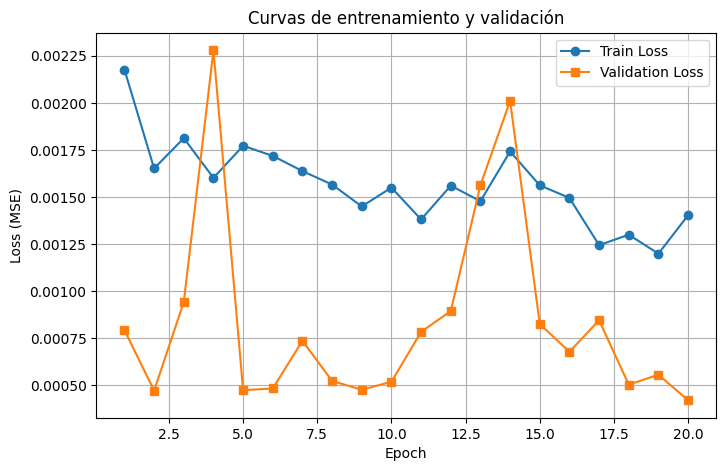

In [55]:
# Graficos iniciales para interpretar mejor los resultados
import matplotlib.pyplot as plt

# Supongamos que guardaste las pérdidas en listas durante el entrenamiento:
train_losses = []
val_losses = []

num_epochs = 20
for epoch in range(num_epochs):
    # --- Entrenamiento ---
    model.train()
    train_loss = 0.0
    for tab_x, vis_x, cat_tag_x, y in train_loader:
        tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(tab_x, vis_x, cat_tag_x)
        loss = criterion(outputs.squeeze(), y.squeeze())
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * tab_x.size(0)
    train_loss /= len(train_loader.dataset)

    # --- Validación ---
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for tab_x, vis_x, cat_tag_x, y in val_loader:
            tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)
            outputs = model(tab_x, vis_x, cat_tag_x)
            loss = criterion(outputs.squeeze(), y.squeeze())
            val_loss += loss.item() * tab_x.size(0)
    val_loss /= len(val_loader.dataset)

    # Guardar pérdidas
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

# --- Gráfico ---
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker="o")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Curvas de entrenamiento y validación")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20 - Train Loss: 0.0668 - Val Loss: 0.0078
Epoch 2/20 - Train Loss: 0.0084 - Val Loss: 0.0036
Epoch 3/20 - Train Loss: 0.0056 - Val Loss: 0.0020
Epoch 4/20 - Train Loss: 0.0046 - Val Loss: 0.0032
Epoch 5/20 - Train Loss: 0.0039 - Val Loss: 0.0012
Epoch 6/20 - Train Loss: 0.0034 - Val Loss: 0.0011
Epoch 7/20 - Train Loss: 0.0033 - Val Loss: 0.0010
Epoch 8/20 - Train Loss: 0.0030 - Val Loss: 0.0011
Epoch 9/20 - Train Loss: 0.0030 - Val Loss: 0.0008
Epoch 10/20 - Train Loss: 0.0028 - Val Loss: 0.0010
Epoch 11/20 - Train Loss: 0.0027 - Val Loss: 0.0008
Epoch 12/20 - Train Loss: 0.0025 - Val Loss: 0.0009
Epoch 13/20 - Train Loss: 0.0027 - Val Loss: 0.0008
Epoch 14/20 - Train Loss: 0.0021 - Val Loss: 0.0007
Epoch 15/20 - Train Loss: 0.0021 - Val Loss: 0.0008
Epoch 16/20 - Train Loss: 0.0023 - Val Loss: 0.0011
Epoch 17/20 - Train Loss: 0.0020 - Val Loss: 0.0008
Epoch 18/20 - Train Loss: 0.0020 - Val Loss: 0.0007
Epoch 19/20 - Train Loss: 0.0019 - Val Loss: 0.0008
Epoch 20/20 - Train L

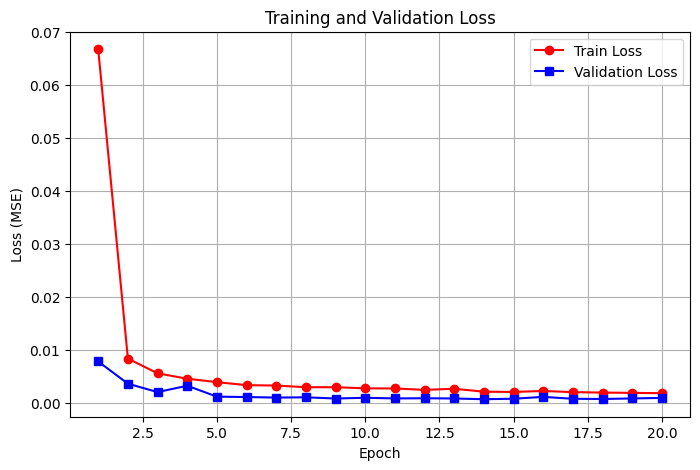

Test RMSE: 0.0270
Test MAE: 0.0217
Test R²: 0.9945


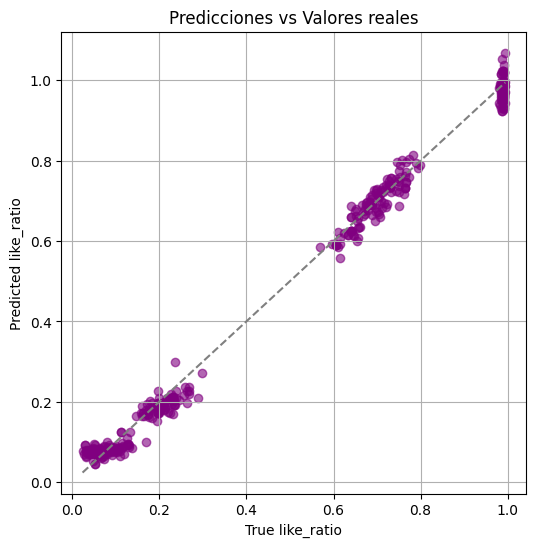

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Inicializar modelo ---
tabular_dim = dataset.tabular.shape[1]
visual_dim = 512
cat_tag_dim = 64
hidden_dim = 256
output_dim = 1

model = MultimodalModel(tabular_dim, visual_dim, cat_tag_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- Entrenamiento ---
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for tab_x, vis_x, cat_tag_x, y in train_loader:
        tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(tab_x, vis_x, cat_tag_x)
        loss = criterion(outputs.squeeze(), y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * tab_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for tab_x, vis_x, cat_tag_x, y in val_loader:
            tab_x, vis_x, cat_tag_x, y = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device), y.to(device)
            outputs = model(tab_x, vis_x, cat_tag_x)
            loss = criterion(outputs.squeeze(), y.squeeze())
            val_loss += loss.item() * tab_x.size(0)
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

# --- Gráfico de curvas ---
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker="o", color="red")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss", marker="s", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# --- Evaluación final en test ---
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for tab_x, vis_x, cat_tag_x, y in test_loader:
        tab_x, vis_x, cat_tag_x = tab_x.to(device), vis_x.to(device), cat_tag_x.to(device)
        outputs = model(tab_x, vis_x, cat_tag_x)
        y_true.extend(y.numpy().flatten())
        y_pred.extend(outputs.cpu().numpy().flatten())

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

# --- Scatter plot de predicciones ---
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.6, color="purple")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="gray", linestyle="--")
plt.xlabel("True like_ratio")
plt.ylabel("Predicted like_ratio")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.show()